In [3]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.Container {width:85% !important;}
div.CodeMirror {font-family:NanumGothic; font-size:13pt; line-height : 150%;}
div.output_area pre {font-family:NanumGothic; font-size:13pt; line-height : 150%;}
div.output_wrapper pre {font-family:NanumGothic; font-size:13pt; line-height : 150%;}
div.input {font-family:NanumGothic; font-size:13pt; line-height : 150%;}
</style>
"""))

# 1절. 텐서플로우 v2.x에서 v1 사용하기

In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# v1으로 사용하기

Instructions for updating:
non-resource variables are not supported in the long term


In [8]:
# tensor = 데이터(상수 or 변수)와의 연산
node1 = tf.constant('Hello, Tensorflow')
sess = tf.Session()

print(sess.run(node1))
print(sess.run(node1).decode())

b'Hello, Tensorflow'
Hello, Tensorflow


In [10]:
# 간단한 수학 연산을 수행하는 그래프
# tensorflow(그래프) 정의
node1 = tf.constant(10, dtype = tf.float32)
node2 = tf.constant(20, dtype = tf.float32)
node3 = tf.multiply(node1, node2)

# 그래프(dataflow) 실행
sess = tf.Session()
print(sess.run([node1, node2, node3]))

sess.close() # 세션을 종료하면 실행 안됌

[10.0, 20.0, 200.0]


## 1.1 Tensorflow
- 그래프 정의
- tf.Session()으로 그래프를 실행
- tf.Session().run()을 통해 값을 확인할 수 있다.

In [4]:
import numpy as np
node1 = tf.constant(np.array([1, 2, 3]), dtype = tf.int16)
node2 = tf.cast(node1, dtype = tf.float32)

sess = tf.Session()
print(sess.run([node2, node1]))

[array([1., 2., 3.], dtype=float32), array([1, 2, 3], dtype=int16)]


In [14]:
data = np.array([1., 2., 3., 4.])
m = tf.reduce_mean(data) # reduce_mean : 평균값을 계산

sess = tf.Session()
print(sess.run(m))

2.5


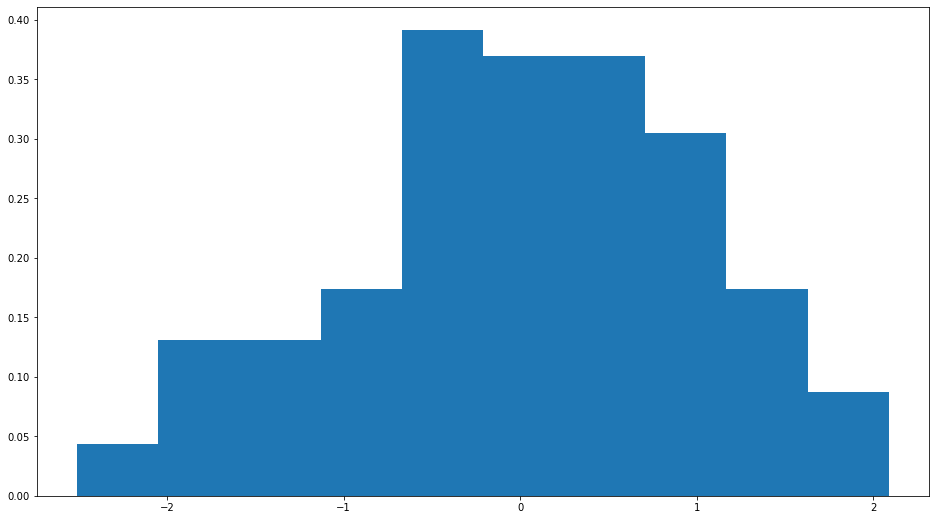

In [5]:
import matplotlib.pyplot as plt
tensor = tf.random_normal([100]) # random_normal([n]) : 평균이 0이고 표준편차가 1인 난수 n개

sess = tf.Session()
plt.figure(figsize=(16, 9))
plt.hist(sess.run(tensor), density=True)
plt.show()

In [16]:
print(sess.run(tensor))

[-1.0060248  -0.8494362   0.12582402  0.02392836  0.09966019  0.34531108
  2.1020906  -1.6774117   0.71676975 -2.2179077  -0.8930714  -0.76224226
  0.28509548  0.38672593 -0.22033471  0.81866324 -1.2979717   0.70301205
 -1.072252    0.7674525  -0.5393061  -0.6748825  -1.1213626   0.6872892
 -0.18835163 -0.5359765  -1.1514037  -0.35852823 -1.2067589  -0.06232808
  1.0620517  -1.026557    1.7229863  -0.0837846  -0.7762997  -0.52146435
  0.7918603   0.67891467 -0.61271054 -0.25714654 -2.0897944   0.8489527
  1.2267942   1.6568959   0.9164015   1.1788082   0.4991103  -0.79172975
  0.61763597  1.3481576   0.8019778   0.14130507  0.38504377  0.01596939
  0.58109885 -0.92298764  0.5403347  -0.05086141  1.383156    0.4600732
  1.821972   -0.7466049  -0.42010862 -0.05353698  0.09034897 -0.04064781
 -0.2251907   1.0361061   1.1729265   0.18645221  0.16155066 -0.82685834
 -0.49961248  1.2488016  -1.3360324   0.05711879  0.6774283  -2.0494506
 -0.64153785  1.2809995   0.2793782   0.01058828  0.542

# 2절. Tensorflow v1을 이용한 Linear Regression을 구현

## 2.1 예측(독립)변수 x가 한개일 때

In [24]:
# tensor graph 정의
# data set (x = 예측변수, y = 결과변수(실제값))
x = np.array([1, 2, 3])
y = np.array([1, 2, 3])

# Weight(기울기)와 bias(절편)
# bias(처음에는 랜덤 값 셋팅, 추후 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]), name = 'weight')
b = tf.Variable(tf.random.normal([1]), name = 'bias')

# Hypothesis (예측치)
H = (W*x) + b

# cost function(최소 제곱법)
cost = tf.reduce_mean(tf.square(H - y))

# 목적 : cost가 최소가 되는 W와 b를 찾는 것
'''
cost함수는 제곱의 평균인 2차함수(곡선). 곡선 위 미분값이 줄어드는 방향으로 학습
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01) # learning_rate : 얼만큼 줄일지
train = optimizer.minimize(cost) # optimizer가 최소가 되도록 cost를 최소화해라

# Session
sess = tf.Session()

# Variable 노드(W, b) 초기화
sess.run(tf.global_variables_initializer())

# # 6000번 학습
# # v2에서는 fit함수
# for step in range(1, 6001):
#     sess.run(train)
#     if step%300 == 0:
#         print('{}번째 학습\ncost : {}\nW값 : {}\nb값 : {}'.format(step, sess.run(cost), sess.run(W), sess.run(b)))
        
for step in range(1, 6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%300 == 0:
        print('{}번째 cost : {}\nW : {}\nb : {}'.format(step, cost_val, W_val, b_val))

300번째 cost : 0.014500155113637447
W : [0.86047983]
b : [0.31716207]
600번째 cost : 0.0034214460756629705
W : [0.9322272]
b : [0.1540636]
900번째 cost : 0.0008073213393799961
W : [0.9670789]
b : [0.07483736]
1200번째 cost : 0.0001904949313029647
W : [0.98400843]
b : [0.03635266]
1500번째 cost : 4.49491199105978e-05
W : [0.99223197]
b : [0.01765858]
1800번째 cost : 1.0605911484162789e-05
W : [0.9962267]
b : [0.00857757]
2100번째 cost : 2.50254811362538e-06
W : [0.9981671]
b : [0.0041666]
2400번째 cost : 5.905947091378039e-07
W : [0.9991095]
b : [0.00202411]
2700번째 cost : 1.3947912691492093e-07
W : [0.9995672]
b : [0.00098376]
3000번째 cost : 3.300721473920021e-08
W : [0.9997895]
b : [0.00047852]
3300번째 cost : 7.835746274054145e-09
W : [0.99989724]
b : [0.00023307]
3600번째 cost : 1.8736407980668446e-09
W : [0.99994963]
b : [0.00011397]
3900번째 cost : 4.566572953113024e-10
W : [0.99997514]
b : [5.6132376e-05]
4200번째 cost : 1.0324865962196839e-10
W : [0.9999882]
b : [2.67902e-05]
4500번째 cost : 2.768700720079

In [25]:
sess.run([W, b])

[array([0.99999774], dtype=float32), array([4.4902276e-06], dtype=float32)]

In [26]:
W_, b_ = sess.run([W, b])

In [27]:
# 최종 회귀식
print('최종적으로 나온 회귀식\nH = ({}*x) + {}'.format(W_[0], b_[0]))

최종적으로 나온 회귀식
H = (0.9999977350234985*x) + 4.490227638598299e-06


In [28]:
# tensor graph 정의
x = np.array([1, 2, 3])
y = [1, 2, 3]

# Weight와 bias
W = tf.Variable(100.0, name = 'weight')
b = tf.Variable(tf.random.normal([1]), name = 'bias')

# Hypothesis
H = (W * x) + b

# cost (최소제곱법)
cost = tf.reduce_mean(tf.square(H - y))
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

# session
sess = tf.Session()

# b노드 초기화
sess.run(tf.global_variables_initializer())

# 4000번 학습
for step in range(1, 4001):
    cost_val, W_val, b_val = sess.run([cost, W, b])
    if step%100 == 1:
        print("{}번째 cost : {}\nW : {}\nb : {}".format(step, cost_val, W_val, b_val))
    
    sess.run(train)

1번째 cost : 45997.59375
W : 100.0
b : [0.6544556]
101번째 cost : 114.50919342041016
W : 13.4290771484375
b : [-28.252445]
201번째 cost : 70.75975799560547
W : 10.769876480102539
b : [-22.209227]
301번째 cost : 43.725215911865234
W : 8.680012702941895
b : [-17.458473]
401번째 cost : 27.01951026916504
W : 7.037188529968262
b : [-13.723948]
501번째 cost : 16.696413040161133
W : 5.745779991149902
b : [-10.788273]
601번째 cost : 10.317375183105469
W : 4.730616092681885
b : [-8.480567]
701번째 cost : 6.375513553619385
W : 3.932605266571045
b : [-6.6665006]
801번째 cost : 3.9396822452545166
W : 3.30529522895813
b : [-5.2404776]
901번째 cost : 2.4344840049743652
W : 2.8121719360351562
b : [-4.119493]
1001번째 cost : 1.5043634176254272
W : 2.424532413482666
b : [-3.238297]
1101번째 cost : 0.9296047687530518
W : 2.11981201171875
b : [-2.545596]
1201번째 cost : 0.5744389295578003
W : 1.8802741765975952
b : [-2.0010698]
1301번째 cost : 0.354968398809433
W : 1.6919755935668945
b : [-1.5730232]
1401번째 cost : 0.219348788261413

## 2.2 예측을 하기 위한 placeholder 이용

In [29]:
# placeholder 이용
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

# ab = tf.add(a, b)
ab = a + b
sess = tf.Session()

# placeholder는 그래프 실행단계에서 값을 설정해야한다.
sess.run(ab, feed_dict = {a:10, b:20})

30.0

In [30]:
sess.run(a, feed_dict = {a:[1, 2, 3]})

array([1., 2., 3.], dtype=float32)

In [31]:
sess.run(ab, feed_dict={a : np.array([10, 20, 30]), 
                        b : np.array([1, 2, 3])})

array([11., 22., 33.], dtype=float32)

In [33]:
# data set (H = 2x + 3)
x_data = np.array([1, 2, 3])
y_data = [5, 7, 9]

# placeholder 설정
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

# Weight & bias
W = tf.Variable(tf.random.normal([1]), name = 'weight')
b = tf.Variable(tf.random.normal([1]), name = 'bias')

# Hypothesis
H = (W * x) + b # 여기서 x는 tensor

# cost function
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], # _만 있는건 필요없는 값
                                         feed_dict = {x : x_data,
                                                      y : y_data}) 
    
    if (step % 200) == 1:
        print('{}번째 cost : {}\nW : {}\nb : {}\n'.format(step, cost_val, W_val, b_val))

1번째 cost : 28.563405990600586
W : [1.452598]
b : [-0.6612966]

201번째 cost : 0.4520893096923828
W : [2.7790456]
b : [1.2290463]

401번째 cost : 0.17263013124465942
W : [2.481403]
b : [1.9056579]

601번째 cost : 0.06591879576444626
W : [2.2974782]
b : [2.3237622]

801번째 cost : 0.02517084777355194
W : [2.1838233]
b : [2.5821269]

1001번째 cost : 0.009611527435481548
W : [2.1135917]
b : [2.741779]

1201번째 cost : 0.0036701911594718695
W : [2.070193]
b : [2.8404346]

1401번째 cost : 0.0014014128828421235
W : [2.0433745]
b : [2.9013996]

1601번째 cost : 0.0005351274739950895
W : [2.0268025]
b : [2.939071]

1801번째 cost : 0.0002043433632934466
W : [2.0165627]
b : [2.962349]

2001번째 cost : 7.802453910699114e-05
W : [2.0102348]
b : [2.9767342]

2201번째 cost : 2.9794297006446868e-05
W : [2.0063245]
b : [2.9856226]

2401번째 cost : 1.1379092029528692e-05
W : [2.0039082]
b : [2.9911156]

2601번째 cost : 4.346763034845935e-06
W : [2.0024157]
b : [2.994509]

2801번째 cost : 1.661839974076429e-06
W : [2.0014942]
b : [2

In [35]:
# 학습된 모델로 부터 예측값 받아보기
sess.run(H, feed_dict = {x : np.array([1, 10, 20])})

array([ 4.999968, 23.000202, 43.00046 ], dtype=float32)

## 2.3 scale이 다른 데이터들의 Linear Regression을 구현

In [122]:
# ▶ scale이 다르면 cost값이 어느 일정한 값에서 더이상 줄지 않는다.
x_data = np.array([1, 2, 5, 8, 10]).reshape(-1, 1)
y_data = np.array([5, 15, 68, 80, 95]).reshape(-1, 1)

from sklearn.preprocessing import MinMaxScaler
scale_x = MinMaxScaler()
scale_x.fit(x_data)
x_data = scale_x.transform(x_data)

scaler_y = MinMaxScaler()
scaler_y.fit(y_data)
y_data = scaler_y.transform(y_data)

# placeholder 설정
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

# Weight & bias
W = tf.Variable(tf.random.normal([1]), name = 'weight')
b = tf.Variable(tf.random.normal([1]), name = 'bias')

# Hypothesis
H = (W * x) + b # 여기서 x는 tensor

# cost function
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], # _만 있는건 필요없는 값
                                         feed_dict = {x : x_data,
                                                      y : y_data}) 
    
    if (step % 200) == 1:
        print('{}번째 cost : {}\nW : {}\nb : {}\n'.format(step, cost_val, W_val, b_val))

1번째 cost : 0.5370861291885376
W : [0.00717284]
b : [-0.07213259]

201번째 cost : 0.04171537607908249
W : [0.55237395]
b : [0.29540426]

401번째 cost : 0.022330760955810547
W : [0.7262805]
b : [0.20775376]

601번째 cost : 0.014711776748299599
W : [0.8342817]
b : [0.15073588]

801번째 cost : 0.011714348569512367
W : [0.9020162]
b : [0.11495956]

1001번째 cost : 0.010535121895372868
W : [0.9445009]
b : [0.09251956]

1201번째 cost : 0.01007118634879589
W : [0.971149]
b : [0.0784445]

1401번째 cost : 0.009888678789138794
W : [0.987863]
b : [0.06961631]

1601번째 cost : 0.00981687568128109
W : [0.99834657]
b : [0.06407904]

1801번째 cost : 0.009788624942302704
W : [1.0049222]
b : [0.06060589]

2001번째 cost : 0.009777511470019817
W : [1.0090464]
b : [0.05842742]

2201번째 cost : 0.009773136116564274
W : [1.0116333]
b : [0.05706111]

2401번째 cost : 0.009771415963768959
W : [1.0132561]
b : [0.05620404]

2601번째 cost : 0.009770744480192661
W : [1.0142738]
b : [0.05566654]

2801번째 cost : 0.009770473465323448
W : [1.014

In [124]:
scaled_input = scale_x.transform(np.array([[2]]))
scaler_y.inverse_transform(sess.run(H, feed_dict = {x:scaled_input}))

array([[20.089104]], dtype=float32)

In [8]:
# ▶ 예측은 할 수 있으나, cost가 너무 큰 값이라 믿을 수가 없다.
# 예측이 재대로 안되는 이유 : global 최소값이 있어도 local 최소값을 만나면 멈춘다.
sess.run(H, feed_dict = {x:5})

array([50.568027], dtype=float32)

In [17]:
# ▶ 작업 할 때 불러와야 할 패키지들
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# warnings.filterwarnings(action = 'ignore')

# 3절. 독립(예측)변수 x가 여러개인 Linear Regression

In [14]:
# ▶ 1. 데이터 셋
x_data = np.array([[73, 80, 75], [93, 88, 93],
                  [89, 91, 90], [96, 98, 100],
                  [73, 66, 70]])

y_data = np.array([[152], [185], [180], [196], [142]])


# ▶ 2. 텐서 그래프 정의
# placeholder로 x와 y 값 입력을 가능하게 만듦
# None : x_data도 받고, 예측할 때도 쓰기 위해 설정해준다.
X = tf.placeholder(shape = [None, 3], dtype = tf.float32) # 몇 행이 들어올지는 모르지만, 3열
Y = tf.placeholder(shape = [None, 1], dtype = tf.float32)

# Weight & bias (weight 3개, bias 1개)
W = tf.Variable(tf.random_normal([3, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

# 예측치(Hypothesis)
# H = (X @ W) + b
H = tf.matmul(X, W) + b

# cost
cost = tf.reduce_mean(tf.square(H - Y))

# train (미분 값이 줄어드는 방향으로 cost가 이동)
train = tf.train.GradientDescentOptimizer(learning_rate = 1e-5).minimize(cost)


# ▶ 3. 텐서 그래프 활성화
# Session & (Variable 초기화)
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W와 b값 초기화 후 랜덤 생성

# 학습시키기
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], 
                           feed_dict = {X : x_data, 
                                        Y : y_data})
    if (step % 3000) == 0:
        print("{}번째 cost : {}".format(step, cost_val))

3000번째 cost : 0.4510837495326996
6000번째 cost : 0.37971633672714233
9000번째 cost : 0.3437015414237976
12000번째 cost : 0.3176122307777405
15000번째 cost : 0.29605668783187866
18000번째 cost : 0.2776169180870056
21000번째 cost : 0.2617050111293793
24000번째 cost : 0.24795690178871155
27000번째 cost : 0.23607149720191956
30000번째 cost : 0.22578588128089905
33000번째 cost : 0.2168969362974167
36000번째 cost : 0.20920798182487488
39000번째 cost : 0.20255336165428162
42000번째 cost : 0.19680650532245636
45000번째 cost : 0.1918279528617859
48000번째 cost : 0.1875239610671997
51000번째 cost : 0.18380126357078552
54000번째 cost : 0.18057981133460999
57000번째 cost : 0.17778989672660828
60000번째 cost : 0.17537455260753632


In [15]:
sess.run([W, b])

[array([[0.98215836],
        [0.48942456],
        [0.5378456 ]], dtype=float32),
 array([0.24147311], dtype=float32)]

In [16]:
# ▶ 4. 학습 후 최종적으로 산출된 W, b로 예측해보기
sess.run(H, feed_dict = {X : np.array([[73, 80, 72]])})

array([[149.81789]], dtype=float32)

# 4절. Ozone량 예측 예제(scale 조정 필요)
* 독립변수 x가 3개 - Multi-variable Linear Regression(다변수 선형회귀)

In [ ]:
# csv파일을 numpy배열로 불러오기(np.loadtext('파일명'))
# csv파일을 데이터프레임으로 불러온 후 결측치 제거 -> 독립변수와 종속변수를 분리

In [21]:
# ▶ 1. 데이터 셋
data = pd.read_csv('./data/ozone.csv', sep = ',')
data.isna().sum()

# ※ ML이나 DL에서는 결측치를 꼭 정제해야한다.
# 결측치가 한 열이라도 있는 행 삭제
data.dropna(inplace = True)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
6,23.0,299.0,8.6,65,5,7
...,...,...,...,...,...,...
147,14.0,20.0,16.6,63,9,25
148,30.0,193.0,6.9,70,9,26
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [27]:
# 독립(예측)변수 : Solar, R, Wind, Temp, 종속(결과)변수 : Ozone 추출
data = data[['Ozone', 'Solar.R', 'Wind', 'Temp']] # 필요한 열만 추출

# 독립(예측)변수, 종속(결과)변수 분리
# x_data = np.array(data[['Solar.R', 'Wind', 'Temp']])
x_data = data[['Solar.R', 'Wind', 'Temp']].values
y_data = data[['Ozone']].values

In [28]:
# 텐서플로 구현
# 1. X, Y
X = tf.placeholder(shape = [None, 3], dtype = tf.float32)
Y = tf.placeholder(shape = [None, 1], dtype = tf.float32)

# 2. W, b
W = tf.Variable(tf.random_normal([3, 1]), name = 'weight') # 3 = 독립변수 개수, 1 = 종속변수 개수
b = tf.Variable(tf.random_normal([1]), name = 'bias')

# 3. H(가설) 세우기
H = tf.matmul(X, W) + b

# 4. cost
cost = tf.reduce_mean(tf.square(H - Y))

# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate = 1e-5).minimize(cost)

# 6. Session & 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [29]:
# 7. 학습시키기
for step in range(1, 12001):
    _, cost_val = sess.run([train, cost], feed_dict={X : x_data, 
                                                     Y : y_data})
    if (step % 300) == 0:
        print('{}번째 cost : {}'.format(step, cost_val))

300번째 cost : 830.6956176757812
600번째 cost : 759.7296752929688
900번째 cost : 702.4736328125
1200번째 cost : 656.2688598632812
1500번째 cost : 618.9825439453125
1800번째 cost : 588.8928833007812
2100번째 cost : 564.6107788085938
2400번째 cost : 545.01513671875
2700번째 cost : 529.2015991210938
3000번째 cost : 516.4398803710938
3300번째 cost : 506.1409912109375
3600번째 cost : 497.8295593261719
3900번째 cost : 491.121826171875
4200번째 cost : 485.7084045410156
4500번째 cost : 481.3393859863281
4800번째 cost : 477.8131408691406
5100번째 cost : 474.96697998046875
5400번째 cost : 472.6697082519531
5700번째 cost : 470.8153381347656
6000번째 cost : 469.3183898925781
6300번째 cost : 468.1098327636719
6600번째 cost : 467.1340026855469
6900번째 cost : 466.3460693359375
7200번째 cost : 465.7096252441406
7500번째 cost : 465.1954040527344
7800번째 cost : 464.780029296875
8100번째 cost : 464.4443054199219
8400번째 cost : 464.17279052734375
8700번째 cost : 463.95318603515625
9000번째 cost : 463.7754211425781
9300번째 cost : 463.63140869140625
9600번째 cost : 

In [30]:
data[1:2]

,Ozone,Solar.R,Wind,Temp
1,36.0,118.0,8.0,72


In [31]:
sess.run(H, feed_dict={X : np.array([[118, 8, 72]])})

array([[41.424614]], dtype=float32)

## 4.1 scale 조정
- normalization (정규화)
- standardization (표준화)

In [ ]:
#                    X - Xmin
# normalization = ㅡㅡㅡㅡㅡㅡㅡ (정규화 공식)
#                  Xmax - Xmin
# sklearn.preprocessing.MinMaxScaler 라이브러리를 통해 위의 식을 대신할 수 있다.

#                       X - Xmean
# standardization = ㅡㅡㅡㅡㅡㅡㅡㅡㅡ (표준화 공식)
#                     Xstd(표준편차)
# sklearn.preprocessing.StandardScaler 라이브러리를 통해 위의 식을 대신할 수 있다.

In [34]:
# ▶ 1. 데이터 셋
data = pd.read_csv('./data/ozone.csv', sep = ',')
data.isna().sum()

# ※ ML이나 DL에서는 결측치를 꼭 정제해야한다.
# 결측치가 한 열이라도 있는 행 삭제
data.dropna(inplace = True)

# 독립(예측)변수 : Solar, R, Wind, Temp, 종속(결과)변수 : Ozone 추출
data = data[['Ozone', 'Solar.R', 'Wind', 'Temp']] # 필요한 열만 추출

# 데이터 표준화
data['Ozone'] = (data['Ozone'] - data['Ozone'].mean()) / data['Ozone'].std()
data['Solar.R'] = (data['Solar.R'] - data['Solar.R'].mean()) / data['Solar.R'].std()
data['Wind'] = (data['Wind'] - data['Wind'].mean()) / data['Wind'].std()
data['Temp'] = (data['Temp'] - data['Temp'].mean()) / data['Temp'].std()

# 독립(예측)변수, 종속(결과)변수 분리
# x_data = np.array(data[['Solar.R', 'Wind', 'Temp']])
x_data = data[['Solar.R', 'Wind', 'Temp']].values
y_data = data[['Ozone']].values

# 텐서플로 구현
# 1. X, Y
X = tf.placeholder(shape = [None, 3], dtype = tf.float32)
Y = tf.placeholder(shape = [None, 1], dtype = tf.float32)

# 2. W, b
W = tf.Variable(tf.random_normal([3, 1]), name = 'weight') # 3 = 독립변수 개수, 1 = 종속변수 개수
b = tf.Variable(tf.random_normal([1]), name = 'bias')

# 3. H(가설) 세우기
H = tf.matmul(X, W) + b

# 4. cost
cost = tf.reduce_mean(tf.square(H - Y))

# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate = 1e-3).minimize(cost)

# 6. Session & 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 7. 학습시키기
for step in range(1, 12001):
    _, cost_val = sess.run([train, cost], feed_dict={X : x_data, 
                                                     Y : y_data})
    if (step % 300) == 0:
        print('{}번째 cost : {}'.format(step, cost_val))

300번째 cost : 2.4794576168060303
600번째 cost : 1.0265825986862183
900번째 cost : 0.5892513990402222
1200번째 cost : 0.45369741320610046
1500번째 cost : 0.4109177589416504
1800번째 cost : 0.39723098278045654
2100번째 cost : 0.3927921950817108
2400번째 cost : 0.39132827520370483
2700번째 cost : 0.3908342123031616
3000번째 cost : 0.3906618654727936
3300번째 cost : 0.39059892296791077
3600번째 cost : 0.3905744254589081
3900번째 cost : 0.3905642330646515
4200번째 cost : 0.3905596435070038
4500번째 cost : 0.3905574083328247
4800번째 cost : 0.390556275844574
5100번째 cost : 0.3905556797981262
5400번째 cost : 0.3905552923679352
5700번째 cost : 0.39055514335632324
6000번째 cost : 0.3905550241470337
6300번째 cost : 0.3905549645423889
6600번째 cost : 0.3905549645423889
6900번째 cost : 0.39055493474006653
7200번째 cost : 0.39055490493774414
7500번째 cost : 0.39055493474006653
7800번째 cost : 0.39055490493774414
8100번째 cost : 0.39055493474006653
8400번째 cost : 0.39055493474006653
8700번째 cost : 0.39055490493774414
9000번째 cost : 0.39055490493774414
9

In [36]:
sess.run([W, b])

[array([[ 0.16385868],
        [-0.35639715],
        [ 0.4731631 ]], dtype=float32),
 array([1.489557e-08], dtype=float32)]

### 4.1.1 Standardization(표준화)

In [41]:
# ▶ 1. 데이터 셋
data = pd.read_csv('./data/ozone.csv', sep = ',')
data.isna().sum()

# ※ ML이나 DL에서는 결측치를 꼭 정제해야한다.
# 결측치가 한 열이라도 있는 행 삭제
data.dropna(inplace = True)

# 독립(예측)변수 : Solar, R, Wind, Temp, 종속(결과)변수 : Ozone 추출
data = data[['Ozone', 'Solar.R', 'Wind', 'Temp']] # 필요한 열만 추출

# -----------------------------------------------------------
# ★★ 데이터 표준화 (API를 이용하여 한꺼번에) ★★
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(data)

# data = scaler.transform(data)
# data = pd.DataFrame(scaler.transform(data), 
#                     columns=['Ozone', 'Solar.R', 'Wind', 'Temp'])

# display(data)
# ------------------------------------------------------------

# 독립(예측)변수, 종속(결과)변수 분리
# x_data = np.array(data[['Solar.R', 'Wind', 'Temp']])
x_data = data[['Solar.R', 'Wind', 'Temp']].values
y_data = data[['Ozone']].values
print(x_data.shape, y_data.shape)

# ------------------------------------------------------------
# ★★ scale 조정 ★★
print('조정 전\n', np.c_[x_data[:2], y_data[:2]])
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
# scaler_x.fit(x_data)
# x_data = scaler_x.transform(x_data)
x_data = scaler_x.fit_transform(x_data)

scaler_y = StandardScaler()
scaler_y.fit(y_data)
y_data = scaler_y.transform(y_data)

print('조정 후\n', np.c_[x_data[:2], y_data[:2]])

# 조정된 데이터를 다시 원 데이터로 해석
# original_x = scaler_x.inverse_transform(x_data)
# original_y = scaler_y.inverse_transform(y_data)

# print('복구 후\n', np.c_[original_x[:2], original_y[:2]])
# ------------------------------------------------------------

# 텐서플로 구현
# 1. X, Y
X = tf.placeholder(shape = [None, 3], dtype = tf.float32)
Y = tf.placeholder(shape = [None, 1], dtype = tf.float32)

# 2. W, b
W = tf.Variable(tf.random_normal([3, 1]), name = 'weight') # 3 = 독립변수 개수, 1 = 종속변수 개수
b = tf.Variable(tf.random_normal([1]), name = 'bias')

# 3. H(가설) 세우기
H = tf.matmul(X, W) + b

# 4. cost
cost = tf.reduce_mean(tf.square(H - Y))

# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate = 1e-3).minimize(cost)

# 6. Session & 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

(111, 3) (111, 1)
조정 전
 [[190.    7.4  67.   41. ]
 [118.    8.   72.   36. ]]
조정 후
 [[ 0.05728624 -0.71707784 -1.13764691 -0.03317961]
 [-0.73618283 -0.54766534 -0.61060682 -0.18411965]]


In [42]:
# 7. 학습시키기
for step in range(1, 12001):
    _, cost_val = sess.run([train, cost], feed_dict={X : x_data, 
                                                     Y : y_data})
    if (step % 300) == 0:
        print('{}번째 cost : {}'.format(step, cost_val))

300번째 cost : 2.2216033935546875
600번째 cost : 1.0723305940628052
900번째 cost : 0.6887829899787903
1200번째 cost : 0.5366185903549194
1500번째 cost : 0.4678725600242615
1800번째 cost : 0.4338746964931488
2100번째 cost : 0.41605278849601746
2400번째 cost : 0.4063764214515686
2700번째 cost : 0.4010155200958252
3000번째 cost : 0.3980117440223694
3300번째 cost : 0.3963182866573334
3600번째 cost : 0.39536044001579285
3900번째 cost : 0.394817590713501
4200번째 cost : 0.3945097029209137
4500번째 cost : 0.39433491230010986
4800번째 cost : 0.3942357301712036
5100번째 cost : 0.39417940378189087
5400번째 cost : 0.39414748549461365
5700번째 cost : 0.39412930607795715
6000번째 cost : 0.3941189646720886
6300번째 cost : 0.39411312341690063
6600번째 cost : 0.3941097855567932
6900번째 cost : 0.3941078782081604
7200번째 cost : 0.39410677552223206
7500번째 cost : 0.3941062092781067
7800번째 cost : 0.39410585165023804
8100번째 cost : 0.39410561323165894
8400번째 cost : 0.39410558342933655
8700번째 cost : 0.3941054940223694
9000번째 cost : 0.3941054344177246
930

In [43]:
input_data = np.array([[118, 8, 72]])

scaled_input_data = scaler_x.transform(input_data)
scaled_input_data

array([[-0.73618283, -0.54766534, -0.61060682]])

In [45]:
scaler_y.inverse_transform(sess.run(H, feed_dict={X : scaled_input_data}))

array([[34.999157]], dtype=float32)

### 4.1.2 Normalization (정규화)

In [48]:
# ▶ 1. 데이터 셋
data = pd.read_csv('./data/ozone.csv', sep = ',')
data.isna().sum()

# ※ ML이나 DL에서는 결측치를 꼭 정제해야한다.
# 결측치가 한 열이라도 있는 행 삭제
data.dropna(inplace = True)

# 독립(예측)변수 : Solar, R, Wind, Temp, 종속(결과)변수 : Ozone 추출
data = data[['Ozone', 'Solar.R', 'Wind', 'Temp']] # 필요한 열만 추출

# 독립(예측)변수, 종속(결과)변수 분리
# x_data = np.array(data[['Solar.R', 'Wind', 'Temp']])
x_data = data[['Solar.R', 'Wind', 'Temp']].values
y_data = data[['Ozone']].values
print(x_data.shape, y_data.shape)

########################################################
# ★★ 정규화 ★★                                      #
print('조정 전\n', np.c_[x_data[:2], y_data[:2]])      # 
from sklearn.preprocessing import MinMaxScaler        #
scale_x = MinMaxScaler()
scale_x.fit(x_data)
x_data = scale_x.transform(x_data)
# x_data = scale_x.fit_transform(x_data)

scaler_y = MinMaxScaler()
scaler_y.fit(y_data)
y_data = scaler_y.transform(y_data)
                                                     # 
print('조정 후\n', np.c_[x_data[:2], y_data[:2]])     #
#######################################################

# 텐서플로 구현
# 1. X, Y
X = tf.placeholder(shape = [None, 3], dtype = tf.float32)
Y = tf.placeholder(shape = [None, 1], dtype = tf.float32)

# 2. W, b
W = tf.Variable(tf.random_normal([3, 1]), name = 'weight') # 3 = 독립변수 개수, 1 = 종속변수 개수
b = tf.Variable(tf.random_normal([1]), name = 'bias')

# 3. H(가설) 세우기
H = tf.matmul(X, W) + b

# 4. cost
cost = tf.reduce_mean(tf.square(H - Y))

# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate = 1e-3).minimize(cost)

# 6. Session & 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

(111, 3) (111, 1)
조정 전
 [[190.    7.4  67.   41. ]
 [118.    8.   72.   36. ]]
조정 후
 [[0.55963303 0.27717391 0.25       0.23952096]
 [0.33944954 0.30978261 0.375      0.20958084]]


In [49]:
# 7. 학습시키기
for step in range(1, 12001):
    _, cost_val = sess.run([train, cost], feed_dict={X : x_data, 
                                                     Y : y_data})
    if (step % 300) == 0:
        print('{}번째 cost : {}'.format(step, cost_val))

300번째 cost : 0.25455859303474426
600번째 cost : 0.22390732169151306
900번째 cost : 0.20430605113506317
1200번째 cost : 0.18744806945323944
1500번째 cost : 0.1722099334001541
1800번째 cost : 0.1583412140607834
2100번째 cost : 0.1457074135541916
2400번째 cost : 0.13419686257839203
2700번째 cost : 0.12370934337377548
3000번째 cost : 0.11415360122919083
3300번째 cost : 0.10544665157794952
3600번째 cost : 0.0975128561258316
3900번째 cost : 0.09028331935405731
4200번째 cost : 0.08369529992341995
4500번째 cost : 0.07769178599119186
4800번째 cost : 0.07222063839435577
5100번째 cost : 0.06723451614379883
5400번째 cost : 0.06269025057554245
5700번째 cost : 0.05854853615164757
6000번째 cost : 0.05477356165647507
6300번째 cost : 0.051332730799913406
6600번째 cost : 0.048196326941251755
6900번째 cost : 0.04533730819821358
7200번째 cost : 0.04273099824786186
7500번째 cost : 0.04035498946905136
7800번째 cost : 0.03818879649043083
8100번째 cost : 0.03621378540992737
8400번째 cost : 0.034413013607263565
8700번째 cost : 0.03277100622653961
9000번째 cost : 0.03

In [50]:
# 8.예측(모델 사용)
input_data = np.array([[118, 8, 72]])
predict_value = sess.run(H, feed_dict={X : scale_x.transform(input_data)})
scaler_y.inverse_transform(predict_value)

array([[24.175076]], dtype=float32)

# 5절. 로지스틱 회귀분석
- Logistic Regression = Binary classification

W값 : 0.03500583430571762 
b값 : 0.1732788798133022


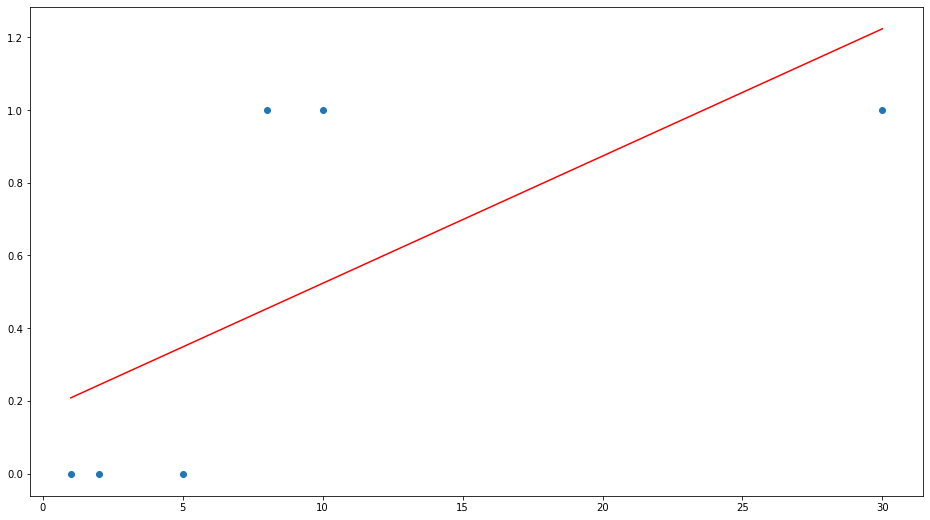

In [58]:
from scipy import stats
x = np.array([1, 2, 5, 8, 10, 30])
y = np.array([0, 0, 0, 1, 1, 1])

lm = stats.linregress(x, y)

# pvalue가 0.05 아래면 신뢰도 95프로에 해당하여 채택
print('W값 :', lm[0], '\nb값 :',lm[1])

plt.figure(figsize=(16, 9))
plt.scatter(x, y)
plt.plot(x, x*lm[0] + lm[1], 'r')
plt.show()

In [70]:
# 교안 pt 50페이지
x_data = np.array([[10, 0], 
                   [8, 1], 
                   [3, 3], 
                   [2, 3], 
                   [5, 1], 
                   [2, 0], 
                   [1, 0]])

y_data = np.array([[1], [1], [1], [1], [0], [0], [0]])

# X, Y
X = tf.placeholder(shape=[None, 2], dtype = tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype = tf.float32)

# Weight, bias
W = tf.Variable(tf.random_normal([2, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

# 가설 세우기(H)
logits = tf.matmul(X, W) + b
H = tf.nn.sigmoid(logits)

# cost 함수
# cost = tf.reduce_mean(tf.square(H - Y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits,
                                                              labels = Y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

# Session & 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [71]:
# 학습시키기
for step in range(1, 3001):
    _, cost_val = sess.run([train, cost], feed_dict={X : x_data, 
                                                     Y : y_data})
    if (step % 300) == 0:
        print('{}번째 cost : {}'.format(step, cost_val))

300번째 cost : 0.6333847045898438
600번째 cost : 0.5369505286216736
900번째 cost : 0.47430914640426636
1200번째 cost : 0.4279950261116028
1500번째 cost : 0.3927278220653534
1800번째 cost : 0.36528438329696655
2100번째 cost : 0.3434687554836273
2400번째 cost : 0.3257668614387512
2700번째 cost : 0.3111262023448944
3000번째 cost : 0.29880625009536743


In [72]:
# 정확도
predict = tf.cast(H>0.5, dtype=tf.float32)
# sess.run(predict, feed_dict={X:x_data})

# 비교하기
correct = tf.equal(predict, Y)
# sess.run(correct, feed_dict={X:x_data, 
#                              Y:y_data})

accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('정확도 :', sess.run(accuracy, feed_dict={X:x_data, Y:y_data}))

정확도 : 0.85714287


In [73]:
# 예측하기
print('H결과 ', sess.run(H, feed_dict={X:np.array([[10, 3]])}))
print('predict 결과 :', sess.run(predict, feed_dict={X:np.array([[10, 3]])}))

H결과  [[0.99127674]]
predict 결과 : [[1.]]


# 6절. multinomial classfication
- 교안 54페이지, 퀴즈1, 2, 3 성적과 출력에 따른 A, B, C등급 분류

In [101]:
# ▶ 1. 데이터 셋
x_data = np.array([[10, 7, 8, 5], 
                   [8, 8, 9, 4], 
                   [7, 8, 2, 3],
                   [6, 3, 9, 3],
                   [7, 5, 7, 4],
                   [3, 5, 6, 2],
                   [2, 4, 3, 1]])

y_data = np.array([['A'],
                   ['A'],
                   ['B'],
                   ['B'],
                   ['B'],
                   ['C'], 
                   ['C']])

# ▶ 2. 데이터 정제 (원-핫 인코딩)
# ※ 종속(결과)변수가 다중분류면 원-핫 인코딩을 해야한다.
# from tensorflow.keras.utils import to_categorical
# to_categorical(y_data) 숫자 데이터가 아니라서 바로 인코딩 불가

# 원-핫 인코딩 방법(1)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_data)

y_data = encoder.fit_transform(y_data) # A = 0, B = 1, C = 2로 분류만 됨
y_data = to_categorical(y_data)

# # 원-핫 인코딩 방법(2)
# encoder = LabelEncoder()
# y_data = encoder.fit_transform(y_data)
# y_data = pd.get_dummies(y_data).values

# # 원-핫 인코딩 방법(3)
# y_data = pd.DataFrame(y_data)
# y_data = pd.get_dummies(y_data).values

y_data = np.array([[1., 0., 0.],
                   [1., 0., 0.],
                   [0., 1., 0.],
                   [0., 1., 0.],
                   [0., 1., 0.],
                   [0., 0., 1.],
                   [0., 0., 1.]])

# X, Y
X = tf.placeholder(shape=[None, 4], dtype = tf.float32)
Y = tf.placeholder(shape=[None, 3], dtype = tf.float32)

# Weight, bias
W = tf.Variable(tf.random_normal([4, 3]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

# 가설 세우기(H)
logits = tf.matmul(X, W) + b
H = tf.nn.softmax(logits) # 3진이상은 softmax

# cost 함수
# cost = tf.reduce_mean(tf.square(H - Y))
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits,
                                                              labels = Y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

# Session & 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습시키기
for step in range(1, 9001):
    _, cost_val = sess.run([train, cost], feed_dict={X : x_data, 
                                                     Y : y_data})
    if (step % 600) == 0:
        print('{}번째 cost : {}'.format(step, cost_val))

C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


600번째 cost : 1.4468300342559814
1200번째 cost : 1.4512957334518433
1800번째 cost : 1.4392529726028442
2400번째 cost : 1.4332305192947388
3000번째 cost : 1.429310917854309
3600번째 cost : 1.4264495372772217
4200번째 cost : 1.4242335557937622
4800번째 cost : 1.4224603176116943
5400번째 cost : 1.4210084676742554
6000번째 cost : 1.4198017120361328
6600번째 cost : 1.4187872409820557
7200번째 cost : 1.4179260730743408
7800번째 cost : 1.417190432548523
8400번째 cost : 1.4165560007095337
9000번째 cost : 1.416007399559021


In [102]:
# 예측하기
y_hat = sess.run(H, feed_dict={X: [[10, 7, 8, 4]]})

print(y_hat.argmax(axis = 1))
print(y_hat)

[1]
[[3.9360712e-05 9.9996066e-01 2.0821443e-13]]


In [103]:
# accuracy 측정
# H -> 0.99 0.002 0.008 -> H.argmax -> 0
# Y -> 1    0     0     -> Y.argmax -> 0
predict = tf.argmax(H, axis=1)
correct = tf.equal(predict, tf.argmax(Y, axis = 1))

# sess.run(correct, feed_dict={X : x_data, 
#                              Y : y_data})

accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))

print(sess.run(accuracy, feed_dict={X : x_data, Y : y_data})*100, '%')

71.42857313156128 %


# 7절. XOR(Exclusive OR)
- 다르면 1, 같으면 0

In [112]:
# 1. 데이터 셋
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = np.array([[0],
                   [1],
                   [1],
                   [0]])

# X, Y
X = tf.placeholder(shape = [None, 2], dtype = tf.float32)
Y = tf.placeholder(shape = [None, 1], dtype = tf.float32)

# Weight, bias
W = tf.Variable(tf.random_normal([2, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

# 가설 세우기(H)
logits = tf.matmul(X, W) + b
H = tf.nn.sigmoid(logits) # 3진이상은 softmax

# cost 함수
# cost = tf.reduce_mean(tf.square(H - Y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits,
                                                              labels = Y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

# Session & 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습시키기
for step in range(1, 6001):
    _, cost_val = sess.run([train, cost], feed_dict={X : x_data, 
                                                     Y : y_data})
    if (step % 300) == 0:
        print('{}번째 cost : {}'.format(step, cost_val))

300번째 cost : 0.7514736652374268
600번째 cost : 0.7211343050003052
900번째 cost : 0.7112942337989807
1200번째 cost : 0.705630898475647
1500번째 cost : 0.7017935514450073
1800번째 cost : 0.6991320848464966
2100번째 cost : 0.6972852945327759
2400번째 cost : 0.6960062980651855
2700번째 cost : 0.6951219439506531
3000번째 cost : 0.6945110559463501
3300번째 cost : 0.6940892934799194
3600번째 cost : 0.6937981843948364
3900번째 cost : 0.6935973167419434
4200번째 cost : 0.6934585571289062
4500번째 cost : 0.6933627724647522
4800번째 cost : 0.6932966709136963
5100번째 cost : 0.6932509541511536
5400번째 cost : 0.6932193040847778
5700번째 cost : 0.6931973099708557
6000번째 cost : 0.693182110786438


In [113]:
# accuracy 측정
predict = tf.cast(H > 0.5, dtype=tf.float32)
correct = tf.equal(predict, Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

sess.run(predict, feed_dict={X:x_data, Y:y_data})

array([[1.],
       [0.],
       [1.],
       [0.]], dtype=float32)

# 8절 DL을 이용한 XOR 예제

In [114]:
# 1. 데이터 셋
x_data = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_data = np.array([[0], [1], [1], [0]])

# X, Y
X = tf.placeholder(shape = [None, 2], dtype = tf.float32)
Y = tf.placeholder(shape = [None, 1], dtype = tf.float32)

# ▶▶ 레이어1의 W, b (입력 2개, 출력 4개)
W1 = tf.Variable(tf.random_normal([2, 4]), name = 'weight1')
b1 = tf.Variable(tf.random_normal([4]), name = 'bias1')

layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

# ▶▶ 레이어2의 W, b (입력 4개, 출력 1개)
W2 = tf.Variable(tf.random_normal([4, 1]), name = 'weight2')
b2 = tf.Variable(tf.random_normal([1]), name = 'bias2')

# Hypothesis(가설 or 예측)
logits = tf.matmul(layer1, W2) + b2
H = tf.sigmoid(logits)

# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits, 
                                                              labels = Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
                      
# Session & 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [117]:
# 학습시키기
for step in range(1, 3001):
    _, cost_val = sess.run([train, cost], feed_dict={X : x_data, 
                                                     Y : y_data})
    if (step % 300) == 0:
        print('{}번째 cost : {}'.format(step, cost_val))
        
# accuracy 측정
predict = tf.cast(H > 0.5, dtype = tf.float32)
correct = tf.equal(predict, Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))

print('정확도 :', sess.run(accuracy, feed_dict={X:x_data, Y:y_data}))

300번째 cost : 0.602193295955658
600번째 cost : 0.5988581776618958
900번째 cost : 0.5955604314804077
1200번째 cost : 0.5923012495040894
1500번째 cost : 0.5890814661979675
1800번째 cost : 0.5858997702598572
2100번째 cost : 0.5827540159225464
2400번째 cost : 0.5796406269073486
2700번째 cost : 0.5765540599822998
3000번째 cost : 0.573487401008606
정확도 : 0.75


In [ ]:
############################
##### 레이어 좀 더 추가 #####
############################

In [118]:
# 1. 데이터 셋
x_data = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_data = np.array([[0], [1], [1], [0]])

# X, Y
X = tf.placeholder(shape = [None, 2], dtype = tf.float32)
Y = tf.placeholder(shape = [None, 1], dtype = tf.float32)

################################################################
# ▶▶ 레이어1 ◀◀의 W, b (입력 2개, 출력 10개)                 ##
W1 = tf.Variable(tf.random_normal([2, 10]), name = 'weight1')  ##
b1 = tf.Variable(tf.random_normal([10]), name = 'bias1')       ##

layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

# ▶▶ 레이어2 ◀◀의 W, b (입력 10개, 출력 20개)
W2 = tf.Variable(tf.random_normal([10, 20]), name = 'weight2')
b2 = tf.Variable(tf.random_normal([20]), name = 'bias2')

# 은닉층에는 relu를 주로 사용한다.
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2) 

# ▶▶ 레이어3 ◀◀의 W, b (입력 20개, 출력 10개)
W3 = tf.Variable(tf.random_normal([20, 10]), name = 'weight3')
b3 = tf.Variable(tf.random_normal([10]), name = 'bias3')

layer3 = tf.nn.relu(tf.matmul(layer2, W3) + b3)

# ▶▶ 레이어4 ◀◀의 W, b (입력 10개, 출력 1개)                 ##
W4 = tf.Variable(tf.random_normal([10, 1]), name = 'weight4') ##
b4 = tf.Variable(tf.random_normal([1]), name = 'bias4')       ##
################################################################

# Hypothesis(가설 or 예측)
logits = tf.matmul(layer3, W4) + b4
H = tf.sigmoid(logits)

# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits, 
                                                              labels = Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
                      
# Session & 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [119]:
# 학습시키기
for step in range(1, 3001):
    _, cost_val = sess.run([train, cost], feed_dict={X : x_data, 
                                                     Y : y_data})
    if (step % 300) == 0:
        print('{}번째 cost : {}'.format(step, cost_val))
        
# accuracy 측정
predict = tf.cast(H > 0.5, dtype = tf.float32)
correct = tf.equal(predict, Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))

print('정확도 :', sess.run(accuracy, feed_dict={X:x_data, Y:y_data}))

300번째 cost : 0.0345814973115921
600번째 cost : 0.013820139691233635
900번째 cost : 0.008213909342885017
1200번째 cost : 0.0056641241535544395
1500번째 cost : 0.004236298147588968
1800번째 cost : 0.0033352915197610855
2100번째 cost : 0.0027257385663688183
2400번째 cost : 0.0022891773842275143
2700번째 cost : 0.0019630994647741318
3000번째 cost : 0.001711148303002119
정확도 : 1.0
